In [13]:
import torch
from op_const_lap import *
import matplotlib.pyplot as plt
from torch_geometric.datasets.sbm_dataset import StochasticBlockModelDataset
from torch_geometric.utils import get_laplacian, to_dense_adj

In [14]:
block_sizes = torch.tensor([20,20,20])
edge_probs = torch.tensor([[0.8,0.3,0.3], [0.3,0.8,0.3], [0.3,0.3,0.8]])
data = StochasticBlockModelDataset(root='data/', block_sizes=block_sizes, num_channels=5, edge_probs=edge_probs)[0]

Processing...
/Users/liushuhan/opt/anaconda3/lib/python3.9/site-packages/torch_geometric/utils/random.py:78: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1646756029501/work/aten/src/ATen/native/TensorShape.cpp:2228.)
  row, col = torch.combinations(torch.arange(num_nodes), r=2).t()
Done!


/var/folders/v7/6y4d148j17v1f9cfgqn0t_ym0000gn/T/ipykernel_83328/3254955531.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.cat([torch.normal(mean=torch.tensor(data.y, dtype=torch.float32)).unsqueeze(0),torch.normal(mean=torch.tensor(data.y, dtype=torch.float32)).unsqueeze(0)], dim=0).t()


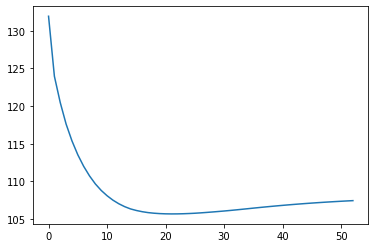

In [15]:
L = to_dense_adj(get_laplacian(data.edge_index)[0], edge_attr=get_laplacian(data.edge_index)[1])[0]
X = torch.cat([torch.normal(mean=torch.tensor(data.y, dtype=torch.float32)).unsqueeze(0),torch.normal(mean=torch.tensor(data.y, dtype=torch.float32)).unsqueeze(0)], dim=0).t()
W, loss_rec, sum_time_compute_A, sum_time_compute_W, sum_time_compute_column_loss, sum_time_compute_column_selection = op_const_lap(X, L, r=3, epsilon=1e-3, ratio=0.5)
plt.plot(loss_rec)

In [16]:
print(sum_time_compute_A, sum_time_compute_W, sum_time_compute_column_loss, sum_time_compute_column_selection)

0:00:00.002935 0:00:00.005226 0:00:00.004449 0:00:00.002079
